### Load necessaries dependencies

In [1]:
import numpy as np 
import pandas as pd 
import seaborn as sns 
from matplotlib import pyplot as plt 
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score

### load and read the dataset

In [2]:
mhr_df = pd.read_csv("data/Maternal_Health_Risk.csv")

In [3]:
mhr_df

,Age,SystolicBP,DiastolicBP,BS,BodyTemp,HeartRate,RiskLevel
0,25,130,80,15.0,98.0,86,high risk
1,35,140,90,13.0,98.0,70,high risk
2,29,90,70,8.0,100.0,80,high risk
3,30,140,85,7.0,98.0,70,high risk
4,35,120,60,6.1,98.0,76,low risk
...,...,...,...,...,...,...,...
1009,22,120,60,15.0,98.0,80,high risk
1010,55,120,90,18.0,98.0,60,high risk
1011,35,85,60,19.0,98.0,86,high risk
1012,43,120,90,18.0,98.0,70,high risk


### Take a look at the first five observations

In [4]:
mhr_df.columns # To look the columns

Index(['Age', 'SystolicBP', 'DiastolicBP', 'BS', 'BodyTemp', 'HeartRate',
       'RiskLevel'],
      dtype='object')

In [5]:
mhr_df.head()

,Age,SystolicBP,DiastolicBP,BS,BodyTemp,HeartRate,RiskLevel
0,25,130,80,15.0,98.0,86,high risk
1,35,140,90,13.0,98.0,70,high risk
2,29,90,70,8.0,100.0,80,high risk
3,30,140,85,7.0,98.0,70,high risk
4,35,120,60,6.1,98.0,76,low risk


### Take a look at the last five observations

In [6]:
mhr_df.tail()

,Age,SystolicBP,DiastolicBP,BS,BodyTemp,HeartRate,RiskLevel
1009,22,120,60,15.0,98.0,80,high risk
1010,55,120,90,18.0,98.0,60,high risk
1011,35,85,60,19.0,98.0,86,high risk
1012,43,120,90,18.0,98.0,70,high risk
1013,32,120,65,6.0,101.0,76,mid risk


### Understand the data information

In [7]:
mhr_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1014 entries, 0 to 1013
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Age          1014 non-null   int64  
 1   SystolicBP   1014 non-null   int64  
 2   DiastolicBP  1014 non-null   int64  
 3   BS           1014 non-null   float64
 4   BodyTemp     1014 non-null   float64
 5   HeartRate    1014 non-null   int64  
 6   RiskLevel    1014 non-null   object 
dtypes: float64(2), int64(4), object(1)
memory usage: 55.6+ KB


In [8]:
mhr_df.shape # to get structure of my dataset

(1014, 7)

### Exploratory Data Analysis

In [9]:
### Checking for missing values and the total for each variables

In [10]:
mhr_df.isnull().sum()

Age            0
SystolicBP     0
DiastolicBP    0
BS             0
BodyTemp       0
HeartRate      0
RiskLevel      0
dtype: int64

In [11]:
mhr_df.isnull() # Returning a boolean expression as dataframe

,Age,SystolicBP,DiastolicBP,BS,BodyTemp,HeartRate,RiskLevel
0,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...
1009,False,False,False,False,False,False,False
1010,False,False,False,False,False,False,False
1011,False,False,False,False,False,False,False
1012,False,False,False,False,False,False,False


### Overview of the descriptive statistic 

In [12]:
mhr_df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Age,1014.0,29.871795,13.474386,10.0,19.0,26.0,39.0,70.0
SystolicBP,1014.0,113.198225,18.403913,70.0,100.0,120.0,120.0,160.0
DiastolicBP,1014.0,76.460552,13.885796,49.0,65.0,80.0,90.0,100.0
BS,1014.0,8.725986,3.293532,6.0,6.9,7.5,8.0,19.0
BodyTemp,1014.0,98.665089,1.371384,98.0,98.0,98.0,98.0,103.0
HeartRate,1014.0,74.301775,8.088702,7.0,70.0,76.0,80.0,90.0


### Getting the shape of the dataset( rows and columns)

In [13]:
mhr_df.shape

(1014, 7)

### count the number of zero enteries for each variables

In [14]:
# count the number of zero enteries
count_missing_ent = ['Age', 'SystolicBP', 'DiastolicBP', 'BS', 'BodyTemp', 'HeartRate',
       'RiskLevel']
for column in count_missing_ent:
  print(column + " *** ")
  print(mhr_df[mhr_df[column] == 0][column].value_counts())

Age *** 
Series([], Name: Age, dtype: int64)
SystolicBP *** 
Series([], Name: SystolicBP, dtype: int64)
DiastolicBP *** 
Series([], Name: DiastolicBP, dtype: int64)
BS *** 
Series([], Name: BS, dtype: int64)
BodyTemp *** 
Series([], Name: BodyTemp, dtype: int64)
HeartRate *** 
Series([], Name: HeartRate, dtype: int64)
RiskLevel *** 
Series([], Name: RiskLevel, dtype: int64)


### Distribution of glucose

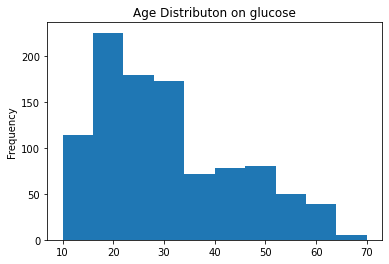

In [15]:
mhr_df["Age"].plot(kind="hist")
plt.title("Age Distributon on glucose")
plt.show()

### Distribution of pregnancies

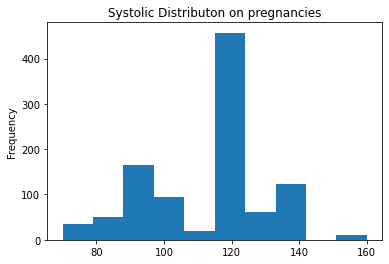

In [16]:
mhr_df["SystolicBP"].plot(kind="hist")
plt.title("Systolic Distributon on pregnancies")
plt.show()

In [17]:
### declare the numerical values to use it for looping

In [18]:
dist_vars = mhr_df.columns[mhr_df.dtypes !='object'].to_list()

In [19]:
dist_vars

['Age', 'SystolicBP', 'DiastolicBP', 'BS', 'BodyTemp', 'HeartRate']

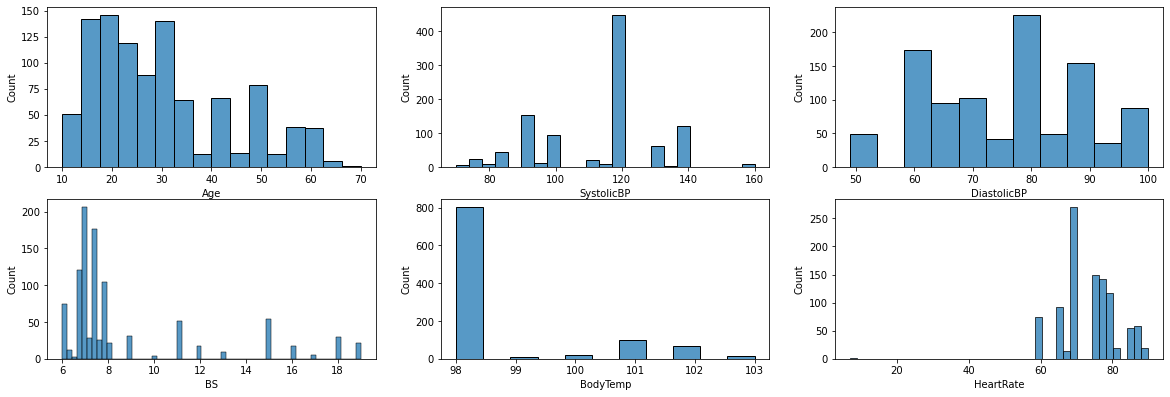

In [20]:
plt.figure(figsize=(20, 10))
for plot in range(len(dist_vars)):
    plt.subplot(3, 3, plot+1)
    sns.histplot(mhr_df[dist_vars[plot]])
plt.show()

### Visauling the variables and outliers detection using boxplot

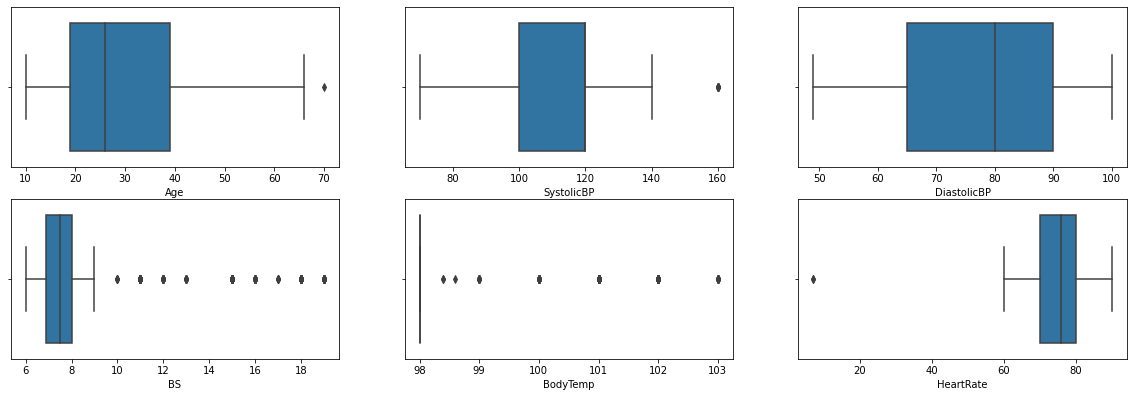

In [21]:
plt.figure(figsize=(20, 10))
for plot in range(len(dist_vars)):
    plt.subplot(3, 3, plot+1)
    sns.boxplot(x =mhr_df[dist_vars[plot]])
plt.show()

In [22]:
### Using violinplot

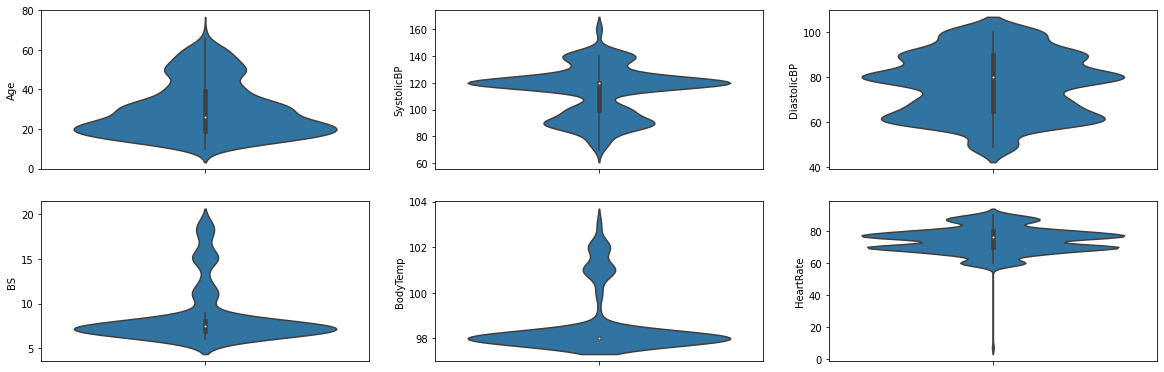

In [23]:
plt.figure(figsize=(20, 10))
for plot in range(len(dist_vars)):
    plt.subplot(3, 3, plot+1)
    sns.violinplot(y = mhr_df[dist_vars[plot]])
plt.show()

In [24]:
### Visualizaing the density shape using pairplot

<Figure size 1440x720 with 0 Axes>

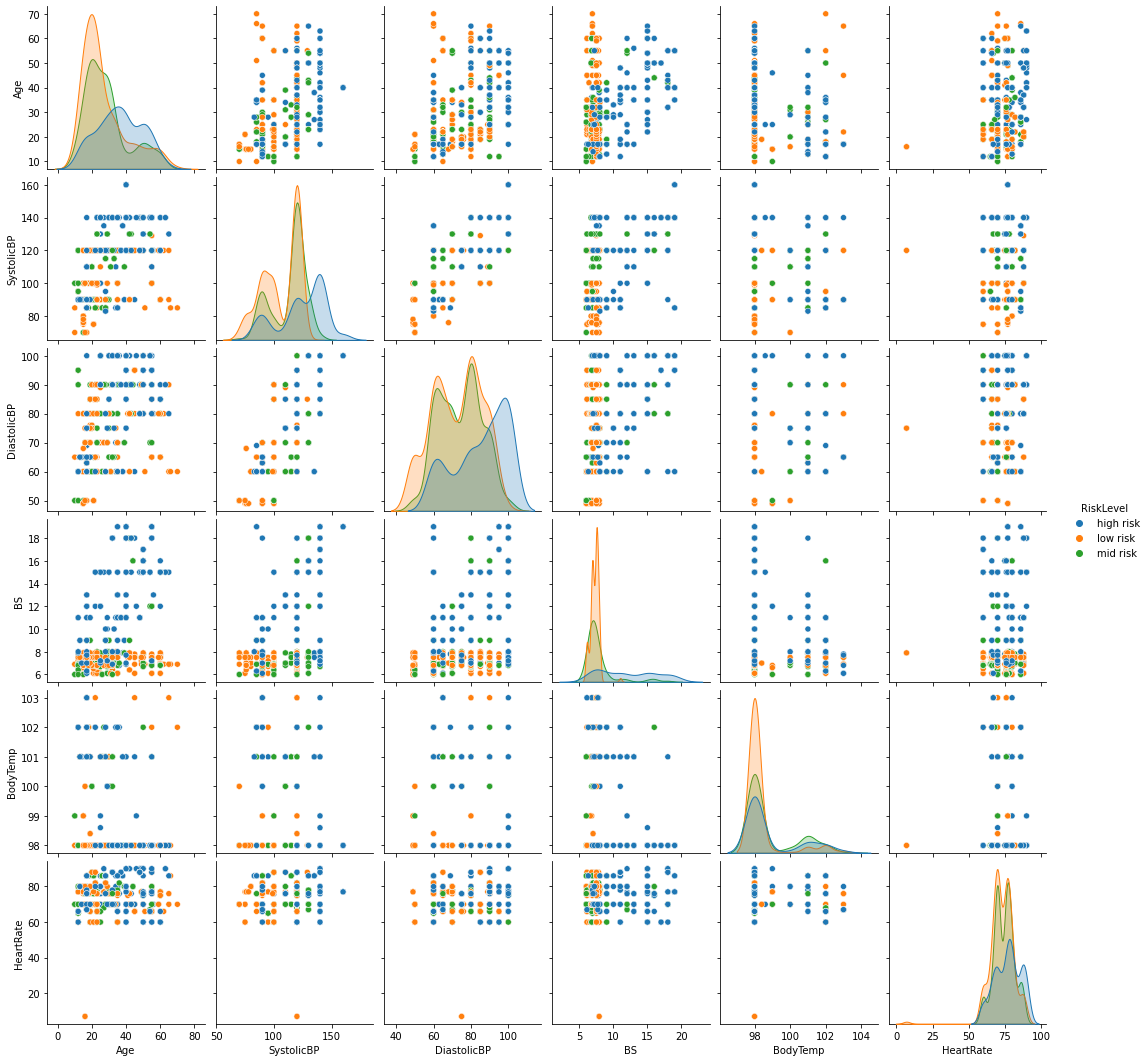

In [25]:
plt.figure(figsize=(20, 10))
sns.pairplot(mhr_df, hue ='RiskLevel')
plt.show()

### Correlation 

In [26]:
mhr_df.corr()

,Age,SystolicBP,DiastolicBP,BS,BodyTemp,HeartRate
Age,1.000000,0.416045,0.398026,0.473284,-0.255323,0.079798
SystolicBP,0.416045,1.000000,0.787006,0.425172,-0.286616,-0.023108
DiastolicBP,0.398026,0.787006,1.000000,0.423824,-0.257538,-0.046151
BS,0.473284,0.425172,0.423824,1.000000,-0.103493,0.142867
BodyTemp,-0.255323,-0.286616,-0.257538,-0.103493,1.000000,0.098771
HeartRate,0.079798,-0.023108,-0.046151,0.142867,0.098771,1.000000


In [27]:
cormat = mhr_df.corr()
round(cormat,2) # rounding to 2 decimal places

,Age,SystolicBP,DiastolicBP,BS,BodyTemp,HeartRate
Age,1.00,0.42,0.40,0.47,-0.26,0.08
SystolicBP,0.42,1.00,0.79,0.43,-0.29,-0.02
DiastolicBP,0.40,0.79,1.00,0.42,-0.26,-0.05
BS,0.47,0.43,0.42,1.00,-0.10,0.14
BodyTemp,-0.26,-0.29,-0.26,-0.10,1.00,0.10
HeartRate,0.08,-0.02,-0.05,0.14,0.10,1.00


### Plotting the correlation on heatmap

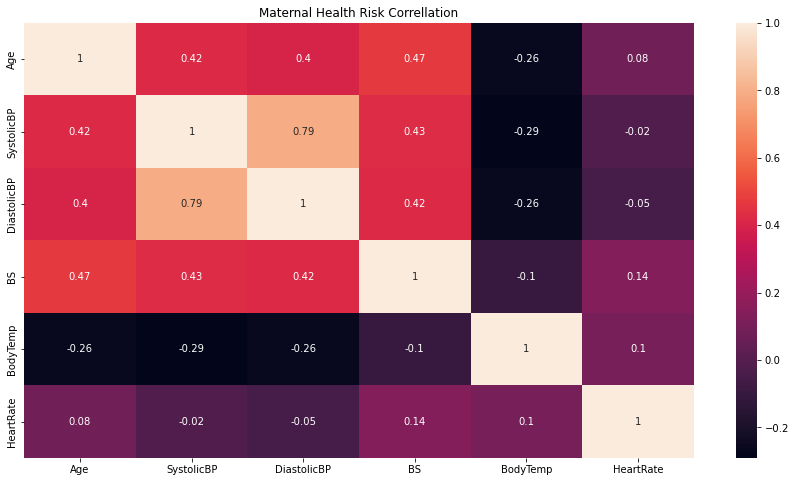

In [28]:
plt.figure(figsize = (15, 8))
sns.heatmap(round(cormat, 2), annot = True)
plt.title("Maternal Health Risk Correllation")
plt.show()

In [29]:
# The 2D correlation matrix
#corr_matrix = diabetes_df.corr()
#corr_matrix["Outcome"].sort_values(ascending=False)

### Visualizing the Risk Levels

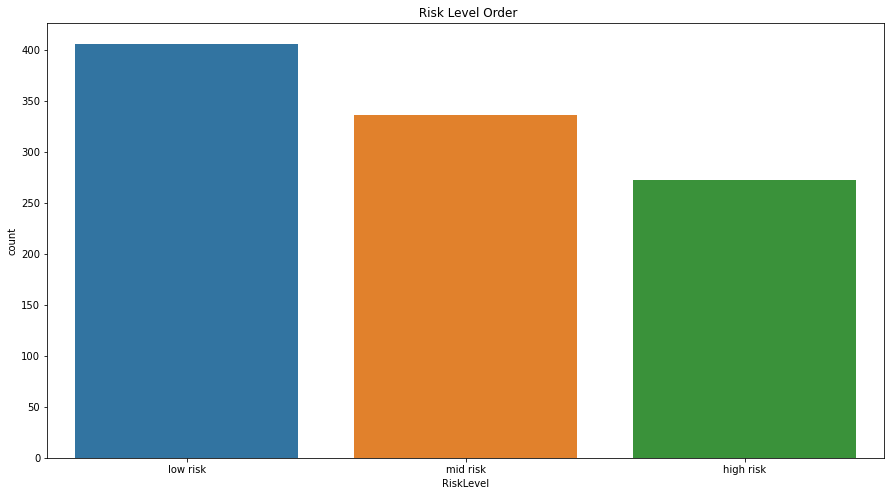

In [30]:
risk_order = ["low risk", "mid risk", "high risk"]
plt.figure(figsize=(15,8))
sns.countplot(x=mhr_df['RiskLevel'], data=mhr_df, order = risk_order)
plt.title(" Risk Level Order")
plt.show()

### Visualizing the percentage of the risk level to view if there is a class imbalance 

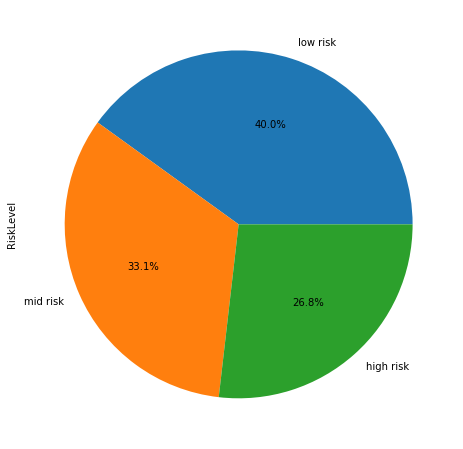

In [31]:
plt.figure(figsize=(15,8))
mhr_df["RiskLevel"].value_counts().plot.pie(autopct="%1.1f%%", labels= ["low risk", "mid risk", "high risk"])
plt.show()

## Risk level is ordinal

In [32]:
mhr_df.head(20)

,Age,SystolicBP,DiastolicBP,BS,BodyTemp,HeartRate,RiskLevel
0,25,130,80,15.00,98.0,86,high risk
1,35,140,90,13.00,98.0,70,high risk
2,29,90,70,8.00,100.0,80,high risk
3,30,140,85,7.00,98.0,70,high risk
4,35,120,60,6.10,98.0,76,low risk
5,23,140,80,7.01,98.0,70,high risk
6,23,130,70,7.01,98.0,78,mid risk
7,35,85,60,11.00,102.0,86,high risk
8,32,120,90,6.90,98.0,70,mid risk
9,42,130,80,18.00,98.0,70,high risk


### I applied label encoding using package from python library

In [33]:
# Instatiate the encoder
LEncoder = LabelEncoder()
X_feats = mhr_df.drop(["RiskLevel"],axis=1)
y_target = mhr_df["RiskLevel"]
y_target = LEncoder.fit_transform(y_target)

In [34]:
pd.DataFrame(y_target)

,0
0,0
1,0
2,0
3,0
4,1
...,...
1009,0
1010,0
1011,0
1012,0


In [35]:
mhr_df.shape

(1014, 7)

### train test split 

In [36]:
X_train, X_test, y_train, y_test = train_test_split(X_feats, y_target, test_size = 1/5, random_state = 32)

### Scaling and standardizing my data

In [37]:
scale = StandardScaler() #Initializ your scaler
X_train_scaled =scale.fit_transform(X_train,)
X_test_scaled = scale.transform(X_test)

### Training my model


### Decision Tree method

In [38]:
classifier = DecisionTreeClassifier( criterion="entropy", random_state= 0)
classifier.fit(X_train_scaled, y_train)

DecisionTreeClassifier(criterion='entropy', random_state=0)

In [39]:
y_predDT= classifier.predict(X_test_scaled)
print(y_predDT)

[1 2 2 1 2 2 0 0 0 1 2 1 2 2 1 2 2 2 1 2 2 2 1 1 1 1 1 2 2 2 0 0 0 2 0 1 2
 2 0 2 2 2 2 0 1 0 2 2 1 0 2 0 1 1 1 2 1 2 2 2 1 1 1 1 2 0 1 1 2 2 2 1 2 1
 2 0 1 0 0 0 1 1 2 0 1 2 2 0 0 1 0 1 2 0 1 1 0 0 2 0 1 0 0 2 0 2 2 1 1 1 2
 0 1 1 2 0 1 1 1 2 2 2 0 0 1 1 1 2 2 0 2 0 1 1 2 2 2 2 2 2 0 1 0 1 1 0 1 0
 1 2 2 0 0 1 2 2 0 1 2 0 1 1 1 2 2 2 1 0 1 2 2 1 1 1 2 1 1 2 2 1 1 0 1 0 0
 0 2 2 2 2 2 2 1 1 0 0 1 1 1 1 1 2 0]


### Evaluating my model

In [40]:
model_accuracy_DT = metrics.accuracy_score(y_test, y_predDT)
print("************")
print("Accuracy: %.2f\n"%(model_accuracy_DT))
print("************\n")
confusion_matrix_DT = metrics.confusion_matrix(y_test, y_predDT)
print("***********************")
print("Confusion Matrix:")
print(confusion_matrix_DT,"\n\n")
print("***********************\n")
print("===================================================")
result_DT = metrics.classification_report(y_test, y_predDT)
print("Classification Report:\n")
print(result_DT)
print("===================================================")

************
Accuracy: 0.88

************

***********************
Confusion Matrix:
[[45  0  2]
 [ 2 69 11]
 [ 3  6 65]] 


***********************

Classification Report:

              precision    recall  f1-score   support

           0       0.90      0.96      0.93        47
           1       0.92      0.84      0.88        82
           2       0.83      0.88      0.86        74

    accuracy                           0.88       203
   macro avg       0.88      0.89      0.89       203
weighted avg       0.88      0.88      0.88       203



### To evaluate the performance of model

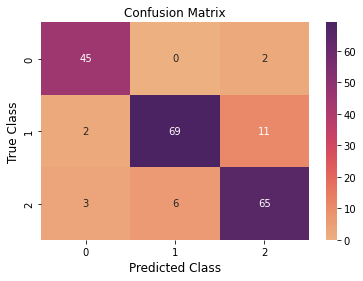

In [41]:
disp = sns.heatmap(confusion_matrix_DT, cmap="flare",annot=True, fmt="d")
plt.xlabel("Predicted Class", fontsize= 12)
plt.ylabel("True Class", fontsize=12)
plt.title("Confusion Matrix", fontsize = 12)
plt.show()

### Using RandomForest algorithm

In [42]:
randon_forest = RandomForestClassifier(n_estimators = 100)
randon_forest.fit(X_train_scaled, y_train)
y_prediction_rf = randon_forest.predict(X_test_scaled)
print(y_prediction_rf)

[1 2 2 1 2 2 0 2 0 2 2 1 2 2 2 2 2 2 1 2 2 2 1 1 1 1 1 2 2 2 0 0 0 2 0 1 2
 2 0 2 2 2 2 0 1 0 2 2 1 0 2 0 1 1 1 2 1 2 2 2 1 1 1 1 2 0 1 1 2 2 2 1 2 1
 2 0 1 0 0 0 1 1 2 0 1 2 2 0 0 1 0 1 1 0 1 1 0 0 2 0 1 0 0 2 0 2 2 1 1 1 2
 0 1 1 2 0 1 1 1 2 2 2 0 0 1 1 1 2 2 0 2 0 1 1 2 2 2 2 2 2 0 1 0 1 1 0 1 0
 1 2 2 0 0 1 2 2 0 1 2 2 1 1 0 2 2 2 1 0 1 2 2 1 1 1 2 1 2 2 2 1 1 0 1 0 0
 0 1 2 2 2 2 2 1 1 0 0 1 1 1 1 1 2 2]


In [43]:
model_accuracy_rf = metrics.accuracy_score(y_test, y_prediction_rf)
print("************")
print("Accuracy: %.2f\n"%(model_accuracy_rf))
print("************\n")
confusion_matrix_rf = metrics.confusion_matrix(y_test, y_prediction_rf)
print("***********************")
print("Confusion Matrix:")
print(confusion_matrix_rf,"\n")
print("***********************\n")
print("===================================================")
result_rf = metrics.classification_report(y_test, y_prediction_rf)
print("Classification Report:\n")
print(result_rf)
print("===================================================")

************
Accuracy: 0.88

************

***********************
Confusion Matrix:
[[44  1  2]
 [ 3 67 12]
 [ 1  5 68]] 

***********************

Classification Report:

              precision    recall  f1-score   support

           0       0.92      0.94      0.93        47
           1       0.92      0.82      0.86        82
           2       0.83      0.92      0.87        74

    accuracy                           0.88       203
   macro avg       0.89      0.89      0.89       203
weighted avg       0.89      0.88      0.88       203



### To evaluate the performance of model

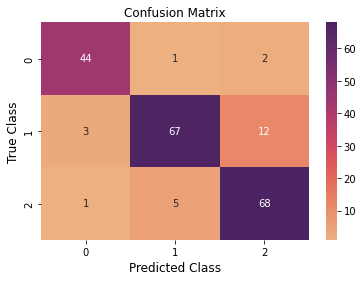

In [44]:
disp = sns.heatmap(confusion_matrix_rf, cmap="flare",annot=True, fmt="d")
plt.xlabel("Predicted Class", fontsize= 12)
plt.ylabel("True Class", fontsize=12)
plt.title("Confusion Matrix", fontsize = 12)
plt.show()